#資料來源：
##從R語言內建的加拿大溫莎市的房屋資料來做分析，資料為1987 年 7 月、8 月和 9 月期間加拿大溫莎市房屋的銷售價格。(資料共546筆，沒有遺失值)

#目標
*   價格(price)

#變數(11)：

*   坪數(lotsize)以平方英尺為單位
*   臥室數(bedrooms)
*   浴室數(bathrooms)
*   樓層數(stories)
*   有無車道(driveway)
*   有無娛樂室(recreation)
*   有無地下室(fullbase)
*   有無熱水器(gasheat)
*   有無中央空調(aircon)
*   車庫數(garage)
*   位於市區(prefer)


##[資料內容相關連結](https://vincentarelbundock.github.io/Rdatasets/doc/AER/HousePrices.html)

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/HousePrices.csv',index_col=0)
df.head()

,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


#資料正規化：
##資料本身的數據數值沒有統一，所以我選擇將資料作正規化。

##使用了最小最大標準化來將除了yes/no以外的資料來正規化，yes/no我選擇用Label encoding來數值化，這樣全部的數值只會介於0~1之間



###最小最大標準化公式：(X-min_X)/(max_X-min_X)

In [ ]:
#將資料做標準化
from sklearn import preprocessing
#將價格－樓層數、車庫數(price－stories、garage)用最小最大標準化
minmax = preprocessing.MinMaxScaler()
df.iloc[:,:5]= minmax.fit_transform(df.iloc[:,:5])
df.iloc[:,:5]=df.iloc[:,:5].round(3)
df.iloc[:,[-2]]= minmax.fit_transform(df.iloc[:,[-2]])
df.iloc[:,-2]=df.iloc[:,-2].round(3)
#將其他資料分(0,1)

df.replace('yes', 1,inplace=True)
df.replace('no', 0,inplace=True)

df

,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
1,0.103,0.289,0.4,0.000,0.333,1,0,1,0,0,0.333,0
2,0.082,0.162,0.2,0.000,0.000,1,0,0,0,0,0.000,0
3,0.148,0.097,0.4,0.000,0.000,1,0,0,0,0,0.000,0
4,0.215,0.344,0.4,0.000,0.333,1,1,0,0,0,0.000,0
5,0.218,0.324,0.2,0.000,0.000,1,0,0,0,0,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
542,0.403,0.216,0.4,0.333,1.000,1,1,0,0,1,0.000,0
543,0.418,0.299,0.4,0.333,1.000,1,0,0,0,1,0.000,0
544,0.473,0.299,0.4,0.333,1.000,1,1,0,0,1,0.333,0
545,0.485,0.299,0.4,0.333,0.333,1,1,0,0,1,0.333,0


#資料分析：
##透過圖表顯示目標與變數之間的趨勢與關係

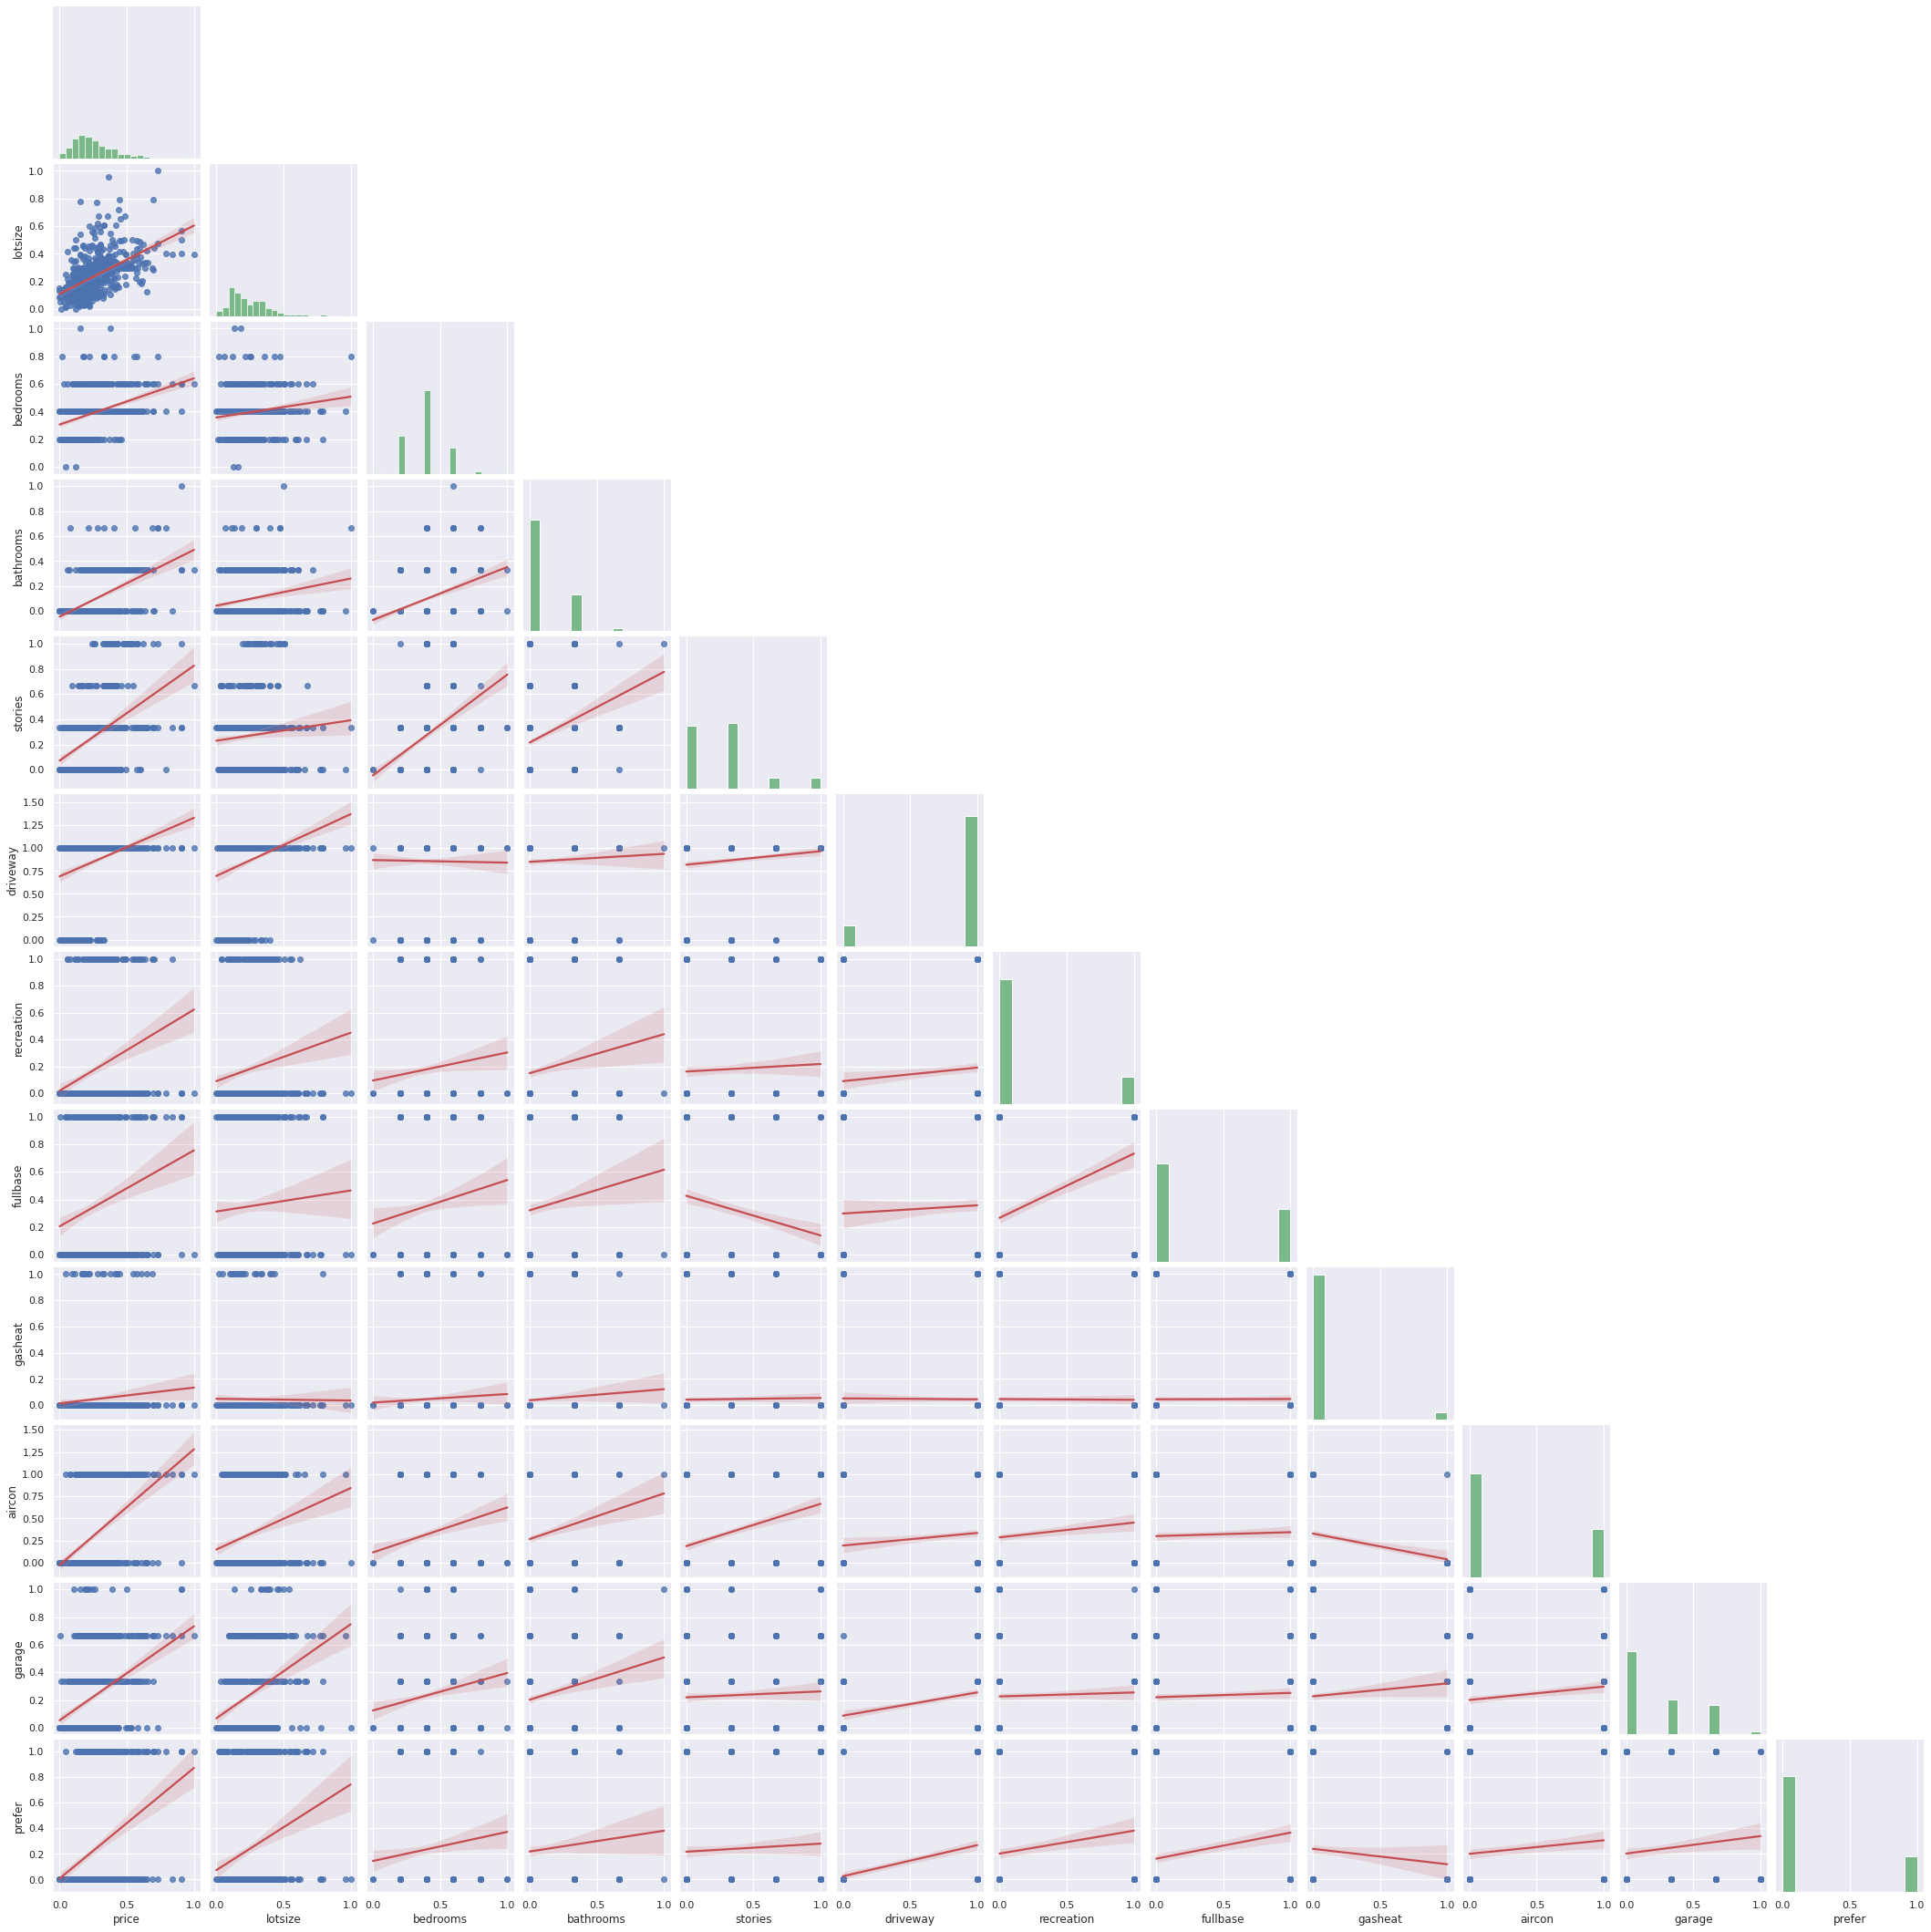

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})

sns.pairplot(df,kind="reg",plot_kws={'line_kws':{'color':'r'},'scatter_kws':{'color':'b'}},diag_kws=dict(color='g'),corner=True)
plt.show()

##由於正規化後，很多數值都是0或1比較難看出趨勢，所以我選擇做相關性矩陣來判斷。




#相關性矩陣與矩陣圖

In [ ]:
df.corr().style.background_gradient(cmap='bwr_r', axis=None).format("{:.2}")

#相關性矩陣，從表可得知所有變數的相關性都落在中度相關與弱相關，裡面的數值沒有0.7以上的強相關。

,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
price,1.0,0.54,0.37,0.52,0.42,0.3,0.26,0.19,0.093,0.45,0.38,0.33
lotsize,0.54,1.0,0.15,0.19,0.084,0.29,0.14,0.047,-0.0092,0.22,0.35,0.23
bedrooms,0.37,0.15,1.0,0.37,0.41,-0.012,0.08,0.097,0.046,0.16,0.14,0.079
bathrooms,0.52,0.19,0.37,1.0,0.32,0.042,0.13,0.1,0.067,0.18,0.18,0.064
stories,0.42,0.084,0.41,0.32,1.0,0.12,0.042,-0.17,0.018,0.3,0.043,0.043
driveway,0.3,0.29,-0.012,0.042,0.12,1.0,0.092,0.043,-0.012,0.11,0.2,0.2
recreation,0.26,0.14,0.08,0.13,0.042,0.092,1.0,0.37,-0.01,0.14,0.038,0.16
fullbase,0.19,0.047,0.097,0.1,-0.17,0.043,0.37,1.0,0.0047,0.045,0.053,0.23
gasheat,0.093,-0.0092,0.046,0.067,0.018,-0.012,-0.01,0.0047,1.0,-0.13,0.068,-0.059
aircon,0.45,0.22,0.16,0.18,0.3,0.11,0.14,0.045,-0.13,1.0,0.16,0.12


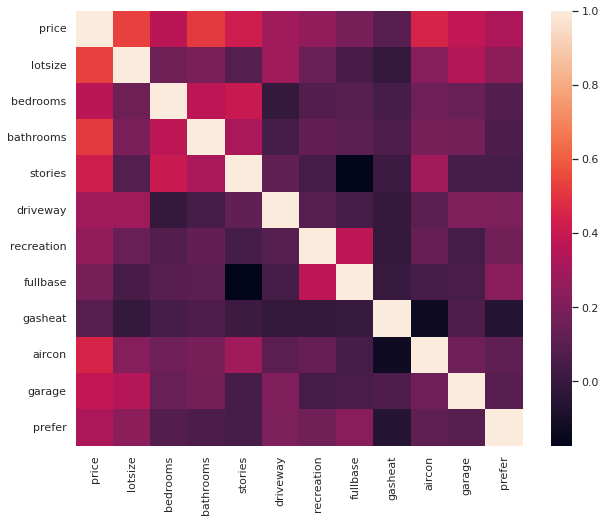

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(df.corr()) #做相關性矩陣圖，從圖可以看到顏色越淺表示相關性越強

##從相關性矩陣圖可得知，目標與變數之間沒有較強的相關性，所以它們是獨立的。

#基礎的資料與箱型圖

count    546.000000
mean       0.261339
std        0.161822
min        0.000000
25%        0.145750
50%        0.224000
75%        0.345000
max        1.000000
Name: price, dtype: float64

IQR= 0.2 下邊界= 0 上邊界= 0.64


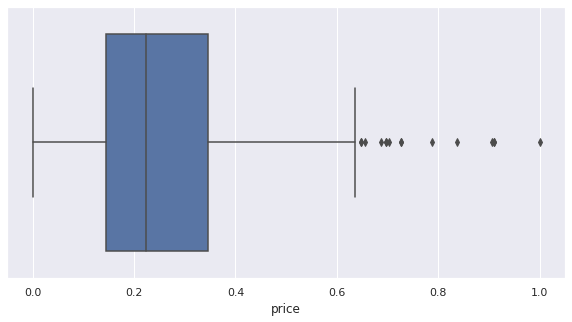

In [ ]:
print(df.iloc[:,0].describe()) #顯示價格的基礎資料
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(data=df,x='price')
IQR=(df.iloc[:,0].quantile(0.75)-df.iloc[:,0].quantile(0.25)).round(2) #四分位距IQR
if (df.iloc[:,0].quantile(0.25)-1.5*IQR) < 0:  #四分位距下邊界計算
  Lower=0
else:
  Lower=(df.iloc[:,0].quantile(0.25)-1.5*IQR).round(2)
Upper=(df.iloc[:,0].quantile(0.75)+1.5*IQR).round(2) #四分位距上邊界計算
print('\nIQR=',IQR,'下邊界=',Lower,'上邊界=',Upper)

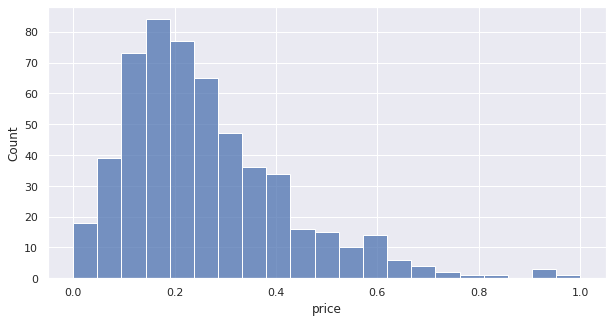

In [ ]:
sns.histplot(data=df,x='price') #購買房屋價格如同人民薪資所得一樣是右偏斜

#主成分分析

##變數的量有點多，所以想用資料降維來方便分析。

In [ ]:
from sklearn.decomposition import PCA
X = df.iloc[:,1:]
y = df.iloc[:,0]
pca = PCA(n_components=3)
pca.fit_transform(X) #轉換後3維
pcs = np.array(pca.components_) #特徵向量
df_pc = pd.DataFrame(pcs, columns=df.columns[1:])
df_pc.index = [f"第{c}主成分" for c in['一', '二', '三']]
df_pc.style.background_gradient(cmap='bwr_r', axis=None).format("{:.2}")


#第1主成分在變數為地下室、娛樂室、市區、中央空調的特徵解釋占比大，並以正相關性為主。
#第2主成分在變數中央空調、地下室、樓層數的特徵解釋占比大，除了地下室其他都是正相關性為主。
#第3主成分在在市區、車道、中央空調、地下室的特徵解釋占比大，車道和在市區是負相關性、其他都是正相關性。


,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
第一主成分,0.079,0.051,0.067,0.038,0.18,0.42,0.65,-0.025,0.38,0.11,0.44
第二主成分,0.072,0.054,0.064,0.31,0.15,-0.11,-0.5,-0.048,0.77,0.12,0.017
第三主成分,-0.074,0.017,0.026,-0.017,-0.38,0.22,0.3,-0.0021,0.34,-0.089,-0.77


##第1主成分在經由特徵去收尋加拿大的房屋性質，我判斷是接近市區的獨立屋。
##第2主成分為鎮屋，房屋都是連在一起的，像是歐美影片裡常出現的房子。
##第3主成分可能是鄉間的小別墅。

##[鎮屋相關照片](https://www.google.com/search?q=%E5%8A%A0%E6%8B%BF%E5%A4%A7%E9%8E%AE%E5%B1%8B&tbm=isch&ved=2ahUKEwiespLCqID8AhUuRvUHHaTDCCYQ2-cCegQIABAA&oq=%E5%8A%A0%E6%8B%BF%E5%A4%A7%E9%8E%AE%E5%B1%8B&gs_lcp=CgNpbWcQA1DADVijFWCCGmgAcAB4AIABT4gBmwOSAQE2mAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=xoidY563Fa6M1e8PpIejsAI&bih=624&biw=1376&hl=zh-TW)

In [ ]:
pca = PCA(3)
pca.fit(X)
np.round(pca.explained_variance_ratio_, 2)
print(pca.explained_variance_,"\n") #解釋變量
print(pca.explained_variance_ratio_) #3維的解釋變量的比例

[0.31226776 0.2342511  0.16118371] 

[0.26594647 0.19950267 0.13727398]


##由於前三項解釋能力只有60%多，所以我想看所有的主成分解釋力。

In [ ]:
pca_10d = PCA(11)
pca_10d.fit(X)
np.round(pca_10d.explained_variance_ratio_, 2)

array([0.27, 0.2 , 0.14, 0.1 , 0.09, 0.06, 0.06, 0.04, 0.02, 0.01, 0.01])

##從上得知主成分分析的結果是不佳的，畢竟如果選擇前三項主成分來分析，會有接近40%的變數解釋力損失，取到90%以上，就喪失了用主成分降維的意義。

#備註：變數轉換公式:原始資料*(pca解釋變量(X))，就會有新的變數。

#使用集群分析

##用K-Means來分群。


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score  #這是測試KMeans要分幾群最理想的套件

X = df.iloc[:,1:]

kmeans_list = [KMeans(n_clusters=k, random_state=46).fit(X) for k in range(1, 12)]
inertias = [model.inertia_ for model in kmeans_list]
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_list[1:]]

##選擇最佳的分群數


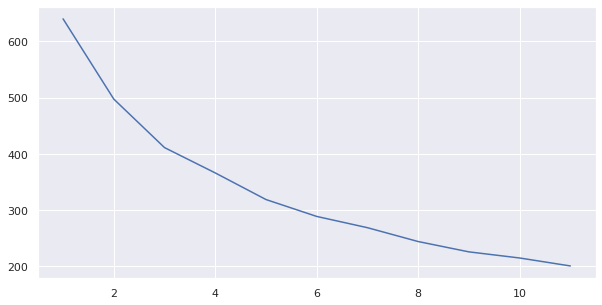

In [ ]:
sns.lineplot(x=range(1,12),y=inertias)  #線轉為平緩的點代表最適的分群，可是此圖的點落在分11群。

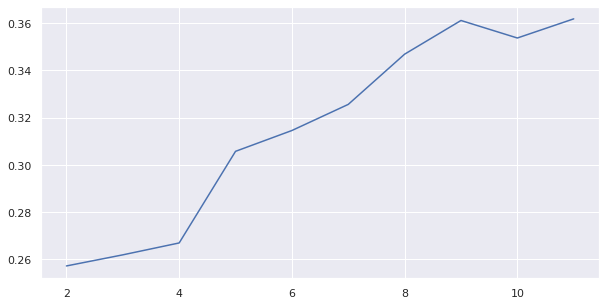

In [ ]:
sns.lineplot(x=range(2,12),y=silhouette_scores) #分數越高的點表示最適的分群，而此圖也落在分9或11群

##由於上方數據得知這組資料不適合k-means來分群

##嘗試實作分兩群

In [ ]:
import copy
Kmeans = KMeans(n_clusters=2)

X = df.iloc[:,1:]
Kmeans.fit(X)

df1 = df.copy()    #複製一個新的data

df1['Kmeans']=Kmeans.labels_  #將分好的值都入d值都入df1
df1

,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer,Kmeans
1,0.103,0.289,0.4,0.000,0.333,1,0,1,0,0,0.333,0,0
2,0.082,0.162,0.2,0.000,0.000,1,0,0,0,0,0.000,0,1
3,0.148,0.097,0.4,0.000,0.000,1,0,0,0,0,0.000,0,1
4,0.215,0.344,0.4,0.000,0.333,1,1,0,0,0,0.000,0,1
5,0.218,0.324,0.2,0.000,0.000,1,0,0,0,0,0.000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,0.403,0.216,0.4,0.333,1.000,1,1,0,0,1,0.000,0,1
543,0.418,0.299,0.4,0.333,1.000,1,0,0,0,1,0.000,0,1
544,0.473,0.299,0.4,0.333,1.000,1,1,0,0,1,0.333,0,1
545,0.485,0.299,0.4,0.333,0.333,1,1,0,0,1,0.333,0,1


##使用相關性矩陣圖來判斷變數與分群的相關性

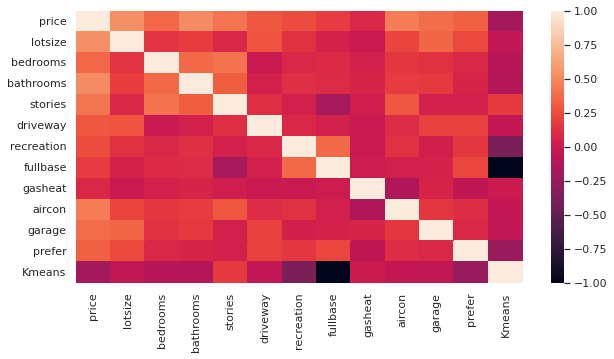

In [ ]:
sns.heatmap(df1.corr()) #從中能發現有一個變數(地下室)是強相關

In [ ]:
df1.corr().style.background_gradient(cmap='bwr_r', axis=None).format("{:.2}")

#相關性矩陣的地下室數值與Kmeans分類是完全一樣的，能判斷他是用有無地下室來分類。

,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer,Kmeans
price,1.0,0.54,0.37,0.52,0.42,0.3,0.26,0.19,0.093,0.45,0.38,0.33,-0.19
lotsize,0.54,1.0,0.15,0.19,0.084,0.29,0.14,0.047,-0.0092,0.22,0.35,0.23,-0.047
bedrooms,0.37,0.15,1.0,0.37,0.41,-0.012,0.08,0.097,0.046,0.16,0.14,0.079,-0.097
bathrooms,0.52,0.19,0.37,1.0,0.32,0.042,0.13,0.1,0.067,0.18,0.18,0.064,-0.1
stories,0.42,0.084,0.41,0.32,1.0,0.12,0.042,-0.17,0.018,0.3,0.043,0.043,0.17
driveway,0.3,0.29,-0.012,0.042,0.12,1.0,0.092,0.043,-0.012,0.11,0.2,0.2,-0.043
recreation,0.26,0.14,0.08,0.13,0.042,0.092,1.0,0.37,-0.01,0.14,0.038,0.16,-0.37
fullbase,0.19,0.047,0.097,0.1,-0.17,0.043,0.37,1.0,0.0047,0.045,0.053,0.23,-1.0
gasheat,0.093,-0.0092,0.046,0.067,0.018,-0.012,-0.01,0.0047,1.0,-0.13,0.068,-0.059,-0.0047
aircon,0.45,0.22,0.16,0.18,0.3,0.11,0.14,0.045,-0.13,1.0,0.16,0.12,-0.045


##從之前的PCA和KMean得知這筆資料可能不適合用來分群，接下來我打算用神經網路(NN)來訓練並預測。

#神經網路(NN)

In [ ]:
#先載入需要的套件
import keras
from pandas.core.frame import to_arrays
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

##畫圖函式

In [ ]:
def PLT(history):

  # "Accuracy/Val_accuracy"
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

  # "Loss/Val_loss"
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

##我想將價格強制分成3類，分別為前25%,中段的50%和後段的25%。

count    546.000000
mean       0.261339
std        0.161822
min        0.000000
25%        0.145750
50%        0.224000
75%        0.345000
max        1.000000
Name: price, dtype: float64


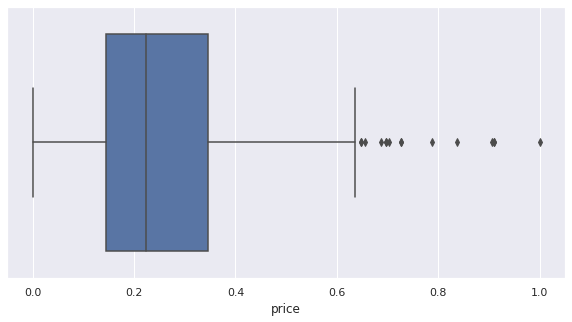

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(data=df,x='price')
print(df.iloc[:,0].describe())

In [ ]:
df.iloc[df.iloc[:,0]>0.345,0]=3
df.iloc[df.iloc[:,0]<0.14575,0]=1
df.iloc[df.iloc[:,0]<1,0]=2

df.iloc[:,0]=df.iloc[:,0].astype('str')  #我先將資料類型轉成文字以方便之後的機器人計算
df.price.value_counts()   #能看到資料已經分類好了

2.0    273
1.0    137
3.0    136
Name: price, dtype: int64

##資料會分割成60%訓練集、20%測試集、20%驗證集

In [ ]:
#透過套件將資料分割
train_df,test_df=train_test_split(df,train_size=0.8) #先分出20%測試集，之後會再分出20%驗證集

train_df = np.array(train_df)
test_df = np.array(test_df)

train_X = train_df[:,1:].astype(float)  #將X資料轉換成統一的類別
test_X = test_df[:,1:].astype(float)

print(train_X.shape)   #確認每個維度的個數
print(test_X.shape)

train_y = train_df[:,0]
test_y = test_df[:,0]

print(train_y.shape)
print(test_y.shape)

(436, 11)
(110, 11)
(436,)
(110,)


##使用One-hot encoding 編碼

##文字類別轉換成0與1編成的個碼

In [ ]:
# 0ne-hot encoding
train_y = pd.get_dummies(train_y).to_numpy()  #將dataframe轉換成array,以方便機器人運算
test_y = pd.get_dummies(test_y).to_numpy()

In [ ]:
train_y

array([[0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]], dtype=uint8)

In [ ]:
#設定模型
from keras.backend import dropout
model = Sequential()
model.add(Dropout(0.1, input_dim=11))        #使用Dropout來避免過度擬合，設定0.1表示有10%的神經元會被隨機丟棄
model.add(Dense(11,activation='relu'))         #使用非線性函數
model.add(Dense(3,activation='softmax'))        #要分三群，所以輸出為3



adam = Adam(lr=0.001)      #使用Adam梯度下降，學習率為0.001
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])  #損失函數是分類交叉商
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_10 (Dropout)        (None, 11)                0         
                                                                 
 dense_20 (Dense)            (None, 11)                132       
                                                                 
 dense_21 (Dense)            (None, 3)                 36        
                                                                 
Total params: 168
Trainable params: 168
Non-trainable params: 0
_________________________________________________________________


##開始訓練模型

In [ ]:
history = model.fit(train_X, train_y, validation_split=0.25, batch_size=4, epochs=500)

#validation_split=0.25是指將train_X的資料集中的0.25做為驗證集 0.8*0.25=0.2 ,就能達成60%訓練、20%測試、20%驗證

Epoch 1/500
82/82 [==============================] - 1s 5ms/step - loss: 1.2685 - accuracy: 0.3364 - val_loss: 1.1017 - val_accuracy: 0.4404
Epoch 2/500
82/82 [==============================] - 0s 3ms/step - loss: 1.1434 - accuracy: 0.4220 - val_loss: 1.0600 - val_accuracy: 0.5138
Epoch 3/500
82/82 [==============================] - 0s 3ms/step - loss: 1.0958 - accuracy: 0.4526 - val_loss: 1.0469 - val_accuracy: 0.5229
Epoch 4/500
82/82 [==============================] - 0s 3ms/step - loss: 1.0588 - accuracy: 0.4618 - val_loss: 1.0349 - val_accuracy: 0.5321
Epoch 5/500
82/82 [==============================] - 0s 3ms/step - loss: 1.0403 - accuracy: 0.4954 - val_loss: 1.0254 - val_accuracy: 0.5321
Epoch 6/500
82/82 [==============================] - 0s 3ms/step - loss: 1.0027 - accuracy: 0.5107 - val_loss: 1.0172 - val_accuracy: 0.5229
Epoch 7/500
82/82 [==============================] - 0s 3ms/step - loss: 0.9921 - accuracy: 0.5474 - val_loss: 1.0106 - val_accuracy: 0.5413
Epoch 8/500
8

##訓練過程的成功率與損失值的圖表(包含驗證集的)

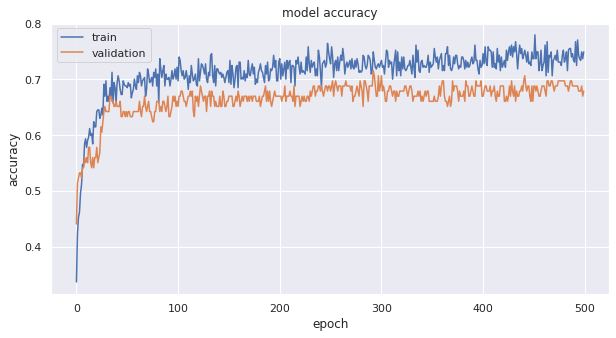

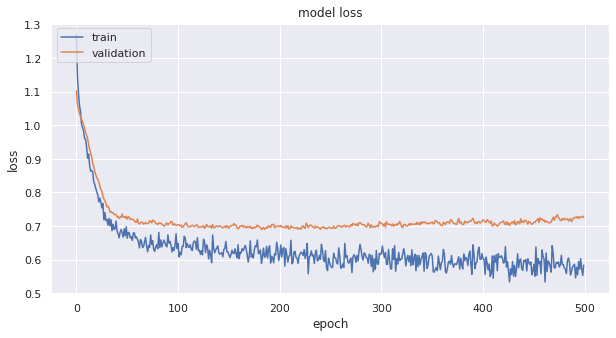

In [ ]:
PLT(history) #圖片結果顯示橘線的最後的準確率有向下的趨勢，損失值的中後段有向上趨勢，代表還是有過度擬合的發生。

##模型的測試分數

In [ ]:
test_loss, test_acc = model.evaluate(test_X, test_y)
print('\nTest accuracy:', test_acc)  #準確率來到72.73%，還可以

4/4 [==============================] - 0s 3ms/step - loss: 0.6620 - accuracy: 0.7273

Test accuracy: 0.7272727489471436


##顯示測試與預測的分類

In [ ]:
test_y=np.argmax(test_y,axis=1)
test_y     #顯示測試集的分類

array([0, 2, 2, 1, 1, 2, 0, 0, 0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1,
       1, 0, 1, 1, 2, 0, 0, 1, 1, 2, 2, 1, 0, 2, 1, 2, 2, 1, 1, 1, 0, 1,
       2, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1,
       1, 2, 1, 2, 2, 1, 1, 0, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 2, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 2, 1])

In [ ]:
predict_y=model.predict(test_X)
classes_y=np.argmax(predict_y,axis=1)
classes_y   #顯示預測的分類結果

4/4 [==============================] - 0s 3ms/step


array([1, 2, 2, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 0, 1,
       1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 0, 1, 0, 1, 2, 2, 0, 2, 0, 2, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1])